# Introduction
<img src = 'https://cdn-images-1.medium.com/max/900/1*TKr1dtcNgJCA8uYY1OhmSg.png'>

Generative Adversarial Networks (GANs) are generative models. They are uses unsupervised technique to generate new things. GAN models learns pattern in input data in such a way that they can generate new sample which resemble with the input data. The main aim of generative adversarial network is to match generated distribution with the original data distribution.

GANs are an exciting and rapidly changing field, delivering generative models ability to generate realistic examples across a range of problem domains, most notably in image-to-image translation tasks such as translating photos of summer to winter or day to night,coloring images and in generating fake photos that even human cannot categorized as fake image.
This <a href = 'https://thispersondoesnotexist.com/'> site </a> uses GAN to generate fake human faces which are similar to real human.

### Components of GANs
<b> Generator </b>: Generator are neural network that learns to generate data which resemble with the input distribution. The generator model take fixed dimension random vector from Gaussian distribution as input and generate the sample out of it which resemble with input.

<b> Discriminator </b>: Discriminator are simple neural network that distinguish fake and real data.The discriminator model takes an example from the domain as input (real or generated) and predicts a binary class label of real or fake.

Generative adversarial networks are based on a game theoretic scenario in which the generator network must compete against an adversary. The generator network directly produces samples. Its adversary, the discriminator network, attempts to distinguish between samples drawn from the training data and samples drawn from the generator.

# Working of GANs
<img src = 'https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/11000153/g1.jpg'>

First of all we take batch of random vector from the Gaussian distribution and generate fake image out of it using generator. Since generator isn't trained so generated image donot resemble with the real input distribution. We take batches of image from the input distribution along with generated fake images and fed it to discriminator so that it learns to distinguish between real and fake images.
Now, after training discriminator, we take the batch of images that generator generated and fed them through discriminator again (here we donot fed real images), discriminator will provide an output probabilities, these values are then compared with the probability that the generator should generated (ie 1), error is calculated and backpropagated through the generator and the weight are updated.
This above process is repeated until generated images resemble with the input distribution.

## Application of GANs

### 1. Generating fake faces

### 2. Generate Examples for Image Datasets

### 3. Face Aging

### 4. Super Resolution

### 5. Image-to-Image Translation

### 6. Photos to Emojis

### 7. Text to image Translation

### 8. Generate Cartoon characters

## Objective: To generate fake faces of human

## Import necessary Libraries

* tensorflow and keras: 
These are fundamental libraries for deep learning. You're likely using TensorFlow and Keras to build and train a neural network for generating fake human faces.

* layers from keras: 
You imported this to access specific layers needed to build your neural network architecture, such as convolutional layers, dense layers, etc.

* numpy: 
It's commonly used for handling numerical data and arrays, which will be useful for various mathematical operations and data manipulation.

* matplotlib.pyplot: 
This library is used for visualizing generated images or plots during the training process. You might use it to show generated faces or training loss curves.

* cv2 (OpenCV): 
OpenCV is a computer vision library often used for image processing. It may be used for various image-related tasks, such as loading and preprocessing images.

* os: 
This module allows you to interact with the file system, which could be helpful for reading and saving image files, model checkpoints, and other data.

* tqdm: 
It's used for creating progress bars, which can help you monitor the progress of time-consuming tasks like training your neural network.

* re: 
You imported regular expressions, which might be used for text processing, such as extracting filenames or patterns from strings.

* img_to_array from keras.preprocessing.image: 
This function is used for converting images into arrays, which is often necessary when working with deep learning models that accept image data.

These libraries and modules provide the necessary tools and functionality for building and training your fake human face generation model.

In [8]:
!pip install tensorflow
!pip install keras
!pip install numpy
!pip3 install opencv-python

In [9]:
import tensorflow as tf
import keras 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm
import re
from keras.preprocessing.image import img_to_array

## Load data
Here I have used face-mask-lite-dataset, out of available 10000 images i have only use 9090 image. I have read image using opencv since opencv reads image in bgr format i have converted it back to rgb format using cvtColor function. These images are resize into 128 by 128 using resize function and are finally converted to array and are appended in empty array

In [10]:
# Function to sort a list of file names in alphanumeric order
def sorted_alphanumeric(data):  
    # Define a conversion function to convert text to numbers if it's all digits
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    # Create a sorting key that splits the text into numeric and non-numeric parts
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    # Sort the data using the alphanumeric sorting key
    return sorted(data,key = alphanum_key)

# Define the size for the images
SIZE = 128

# Initialize an empty list to store the images
_img = []

# Specify the path where the image files are located
# Replace this path with the actual path to your image files
#path = '../input/face-mask-lite-dataset/without_mask'
path = '/Users/sriram/Undergrad/minor proj/without_mask'

# List all files in the specified path and sort them alphanumerically
files = os.listdir(path)
files = sorted_alphanumeric(files)

# Loop through the sorted file names
for i in tqdm(files):
        # Check if the current file is 'seed9090.png' and exit the loop if so
        if i == 'seed9090.png':
            break
        else:
            # Read the image using OpenCV (BGR format)
            img = cv2.imread(path + '/'+i,1)
            
            # open cv reads images in BGR format so we have to convert it to RGB
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            # Resize the image to the specified SIZE
            img = cv2.resize(img, (SIZE, SIZE))
            
            # Normalize the image pixel values to the range [-1, 1]
            img = (img - 127.5) / 127.5
            
            # Convert the image to float and append it to the _img list
            imh = img.astype(float)
            _img.append(img_to_array(img))

 91%|█████████ | 9090/10000 [03:18<00:19, 45.69it/s]


## Visailze our images

/var/folders/xs/y6zk6zl96xg8ch9z2frf01x40000gn/T/ipykernel_65903/2538242674.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(sqr,sqr,i+1)


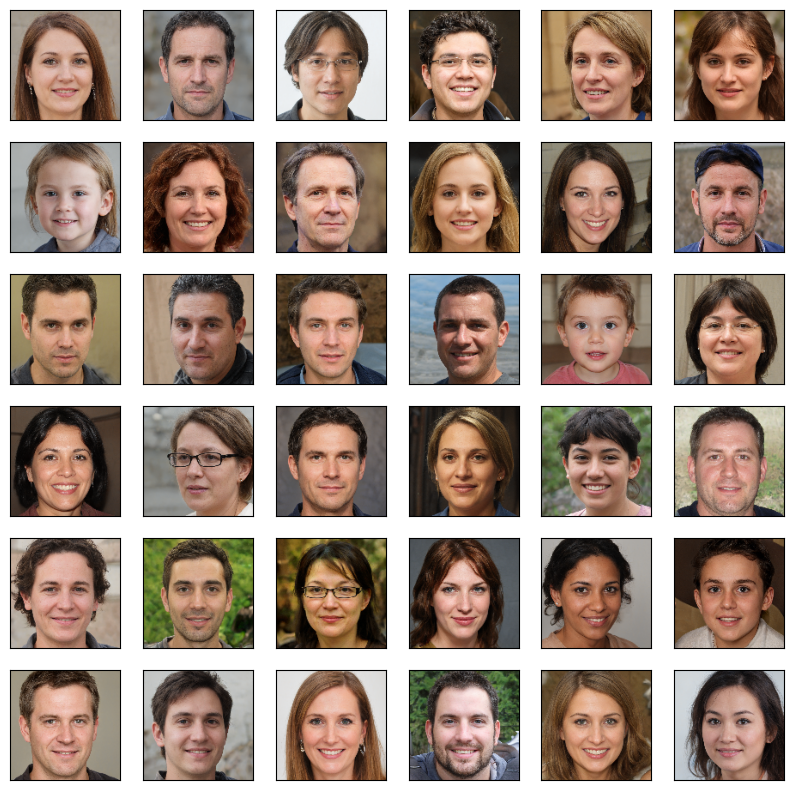

In [11]:
# Function to plot a grid of images
def plot_images(sqr = 5):
    # Create a new figure with a specific size
    plt.figure(figsize = (10,10))
    # Set the title of the figure
    plt.title("Real Images",fontsize = 35)
    # Loop through a grid of squares (sqr x sqr)
    for i in range(sqr * sqr):
        # Create a subplot within the grid
        plt.subplot(sqr,sqr,i+1)
        # Display an image from the _img list, adjusting its values to the range [0, 1]
        plt.imshow(_img[i]*0.5 + 0.5 )
        # Remove the x and y tick marks
        plt.xticks([])
        plt.yticks([])

# Call the plot_images function to display a grid of images (default grid size is 5x5)
plot_images(6)
    

Here, i have defined batch size so that these batches of images can be fed directly to the discriminator network


# NOTE:
The batch_size is a critical parameter in the training of machine learning and deep learning models, and it serves several important purposes:

* Efficient Memory Usage: When you have a large dataset, it may not fit entirely into the memory of your GPU or CPU. By dividing the dataset into smaller batches, you can process a subset of the data at a time, allowing you to work with datasets that are too large to fit into memory.

* Faster Training: Batching enables parallelism, which can significantly speed up the training process. Many deep learning frameworks are optimized to perform matrix operations efficiently on batched data. This means that processing multiple data points at once can lead to faster training times compared to processing them one by one.

* Stochastic Gradient Descent (SGD): Batch training is a key component of stochastic gradient descent (SGD) and its variants. In SGD, you update the model's weights after each batch of data rather than after processing the entire dataset. This introduces randomness into the optimization process, which can help the model escape local minima and converge to a better solution.

* Regularization: Batching can also act as a form of regularization. When you update the model's weights after each batch, it introduces noise into the optimization process. This noise can help prevent overfitting by making the model's updates less deterministic.

* Generalization: Training on batches instead of the entire dataset can lead to better generalization. It forces the model to learn patterns from smaller subsets of the data, potentially improving its ability to generalize to unseen examples.

In summary, the batch_size is a crucial hyperparameter that affects memory efficiency, training speed, and the optimization process of machine learning and deep learning models. It allows you to balance trade-offs between computational resources and model performance.

* Slicing: Slicing data means taking a portion or subset of a larger dataset. It's like selecting a specific range or section of a list, array, or dataset to focus on. For example, if you have a long list of numbers, you can "slice" it to get only the numbers between positions 5 and 10.

In [ ]:
# Define the batch size for the dataset
batch_size = 32

# Create a TensorFlow Dataset from slices of a NumPy array containing images (_img)
# Each element of the dataset corresponds to one image slice
# Batching is applied to group a specified number of images into each batch
dataset=tf.data.Dataset.from_tensor_slices(np.array(_img)).batch(batch_size)

# Generator 
Here, I have defined generator network. It take random vector from normal distribution as input. This random vector is passed through dense layer and is reshaped and is finally fed through Convolution layers. Here, convolution layers does downsampling of our latent vector, after series of convolution batch normalization and leakyrelu layer our downsampled latent vector is upsampled using Conv2DTranspose.

The final output layer of Generator generate 128 by 128 by 3 image. The final layer of generator uses hyperbolic tangent as activation to squash the value in between -1 and 1. Generator model looks like simple autoencoder model, where input data is downsampled first and is finally upsampled .

# Note:
* Sequential Model:
    In simple terms, a sequential model is like a recipe for creating something.
Imagine making a sandwich where you follow a series of steps: add bread, add ingredients, add another piece of bread. That's similar to how a sequential model works in deep learning.
It's a way to organize different parts (layers) of a neural network one after the other, where each layer processes the output of the previous one. It's like a sequence of instructions.

* Downsampling Layers:
    Think of downsampling as shrinking or reducing something in size.
In the code, downsampling layers are like a special tool for making pictures smaller while keeping important details.
They help the model focus on capturing general features of the image, like big shapes and patterns, by making the image dimensions smaller.

* Upsampling Layers:
    Upsampling is the opposite of downsampling; it's like making something larger.
In the code, upsampling layers are used to make the picture bigger again after the downsampling.
They help the model add more detail to the image, like fine textures and small features.

* tanh Function (Activation):
    Think of the tanh function like a "squisher" or "compressor."
It takes a number and maps it to be between -1 and 1.
In the code, tanh is used as the final step to make sure the generated image's pixel values are within a certain range. It's like adjusting the brightness and contrast of a picture to make it look better.

In summary, the code uses a recipe-like sequential model to create a neural network. It uses downsampling layers to focus on big picture details, upsampling layers to add fine details, and the tanh function to make sure the generated image looks good.

# Prerequisites:
* tf.keras.Sequential(): This creates a sequence of neural network layers, allowing you to define the model's architecture layer by layer.

* layers.Dense(...): This fully connected layer maps the initial noise vector (input) to a large tensor. It provides a starting point for generating images by expanding the input.

* layers.Reshape(...): Reshapes the tensor to match the desired image dimensions (128x128x3). This prepares the tensor to be processed as an image.

* tf.keras.layers.Conv2D(...): These are convolutional layers responsible for learning features from the image. The Conv2D layers perform operations like recognizing edges, shapes, and patterns in the image.

* tf.keras.layers.BatchNormalization(): This layer helps stabilize and speed up the training process by normalizing the inputs to each layer. It's like ensuring that all the ingredients in a recipe are of the right proportions.

* tf.keras.layers.LeakyReLU(): This activation function introduces non-linearity into the model. It helps the model learn complex patterns and prevents some of the training issues, like vanishing gradients.

* tf.keras.layers.Conv2DTranspose(...): These are transposed convolutional layers, also known as deconvolution layers or upsampling layers. They help increase the spatial dimensions of the tensor, essentially "blowing up" the image to add more detail.

* kernel_initializer='he_normal': This initializer sets the initial weights of the layers. The 'he_normal' initializer is commonly used in deep learning models to ensure effective training.



In [ ]:
# Define the dimensionality of the input noise vector (latent space)
latent_dim = 100

# Define the Generator model architecture
def Generator():
    # Create a Sequential model
    model = tf.keras.Sequential()
    
    # Fully connected layer to map the noise vector to a large tensor
    model.add(layers.Dense(128*128*3, use_bias=False, input_shape=(latent_dim,)))
    
    # Reshape the tensor to match the desired image dimensions (128x128x3)
    model.add(layers.Reshape((128,128,3)))
    
    # Downsampling layers: Convolutional layers with BatchNormalization and LeakyReLU activation
    model.add(tf.keras.layers.Conv2D(128,4, strides=1, padding='same',kernel_initializer='he_normal', use_bias=False))
    model.add(tf.keras.layers.Conv2D(128,4, strides=2, padding='same',kernel_initializer='he_normal', use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Conv2D(256,4, strides=1, padding='same',kernel_initializer='he_normal', use_bias=False))
    model.add(tf.keras.layers.Conv2D(256,4, strides=2, padding='same',kernel_initializer='he_normal', use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Conv2DTranspose(512, 4, strides=1,padding='same',kernel_initializer='he_normal',use_bias=False))
    model.add(tf.keras.layers.Conv2D(512,4, strides=2, padding='same',kernel_initializer='he_normal', use_bias=False))
    
    model.add(tf.keras.layers.LeakyReLU())
    
    # Upsampling layers: Transposed Convolutional layers with BatchNormalization and LeakyReLU activation
    model.add(tf.keras.layers.Conv2DTranspose(512, 4, strides=1,padding='same',kernel_initializer='he_normal',use_bias=False))
    model.add(tf.keras.layers.Conv2DTranspose(512, 4, strides=2,padding='same',kernel_initializer='he_normal',use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Conv2DTranspose(256, 4, strides=1,padding='same',kernel_initializer='he_normal',use_bias=False))
    model.add(tf.keras.layers.Conv2DTranspose(256, 4, strides=2,padding='same',kernel_initializer='he_normal',use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.Conv2DTranspose(128, 4, strides=2,padding='same',kernel_initializer='he_normal',use_bias=False))
    model.add(tf.keras.layers.Conv2DTranspose(128, 4, strides=1,padding='same',kernel_initializer='he_normal',use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    
    # Output layer with tanh activation to generate the image
    model.add(tf.keras.layers.Conv2DTranspose(3,4,strides = 1, padding = 'same',activation = 'tanh'))
    
    return model

In [14]:
# Create a generator model using the Generator() function
generator = Generator()

# Display a summary of the generator model
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 49152)             4915200   
                                                                 
 reshape (Reshape)           (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 128)     6144      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       262144    
                                                                 
 batch_normalization (Batch  (None, 64, 64, 128)       512       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 128)       0         
                                                        

# Discriminator
Here, discriminator model take 128 by 128 by 3 image that can be real or generated. This input image is downsampled using Convolution layer and is finally flattened and is fed to single neuron so that it can distinguish real and fake image. Since, final layer uses sigmoid function as activation, it output value in between 0 and 1. Here value greater than 0.5 refers to real and less than 0.5 refers to fake image. The output of discriminator is used in training of generator.

In [15]:
# Define the Discriminator model
def Discriminator():
    # Create a Sequential model to stack layers
    model = tf.keras.models.Sequential()
    
    # Input layer for images with specified dimensions (SIZE x SIZE x 3)
    model.add(tf.keras.layers.Input((SIZE, SIZE, 3)))
    
    # Convolutional layers with downsampling, BatchNormalization, and LeakyReLU activations
    model.add(tf.keras.layers.Conv2D(128,4, strides=2, padding='same',kernel_initializer='he_normal', use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Conv2D(128,4, strides=2, padding='same',kernel_initializer='he_normal', use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Conv2D(256,4, strides=2, padding='same',kernel_initializer='he_normal', use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Conv2D(256,4, strides=2, padding='same',kernel_initializer='he_normal', use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Conv2D(512,4, strides=2, padding='same',kernel_initializer='he_normal', use_bias=False))
    
    # LeakyReLU activation (no BatchNormalization) for the last convolutional layer
    model.add(tf.keras.layers.LeakyReLU())
    
    # Flatten the output to prepare for the final classification layer
    model.add(tf.keras.layers.Flatten())
    
    # Final classification layer with a sigmoid activation (to output a probability)
    model.add(tf.keras.layers.Dense(1,activation = 'sigmoid'))
    
    return model
  


In [16]:
# Create a discriminator model using the Discriminator() function
discriminator = Discriminator()

# Display a summary of the discriminator model
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 64, 64, 128)       6144      
                                                                 
 batch_normalization_5 (Bat  (None, 64, 64, 128)       512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 64, 64, 128)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 128)       262144    
                                                                 
 batch_normalization_6 (Bat  (None, 32, 32, 128)       512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 32, 32, 128)      

### Let's plot image generated by generator before training

# Note:
* noise = np.random.normal(-1, 1, (1, 100)): This line creates a random noise vector. The np.random.normal function generates random numbers from a normal distribution with a mean of -1 and a standard deviation of 1. The resulting noise vector has a shape of (1, 100), which means it contains 100 random values.

* img = generator(noise): Here, the generator model is used to transform the random noise vector into an image. This is a crucial step in a Generative Adversarial Network (GAN) where the generator attempts to create realistic-looking images from noise.

* plt.imshow(img[0, :, :, 0]): This line displays the generated image using Matplotlib. plt.imshow is a function for displaying images, and img[0, :, :, 0] is used to access the image data. The [0, :, :, 0] indexing is used to extract the first (and only) image from the batch and its first color channel.

* plt.show(): Finally, this line displays the image in a graphical window.

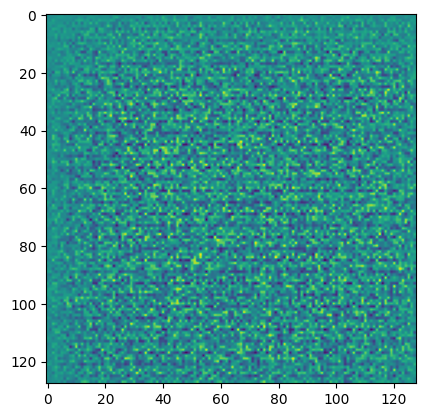

In [17]:
# Generate random noise as input for the generator
noise = np.random.normal(-1,1,(1,100))

# Use the generator model to create an image from the noise
img = generator(noise)

# Display the generated image
plt.imshow(img[0,:,:,0])
plt.show()

### Defining loss function and optimizer 

# Note:

-> optimizer = tf.keras.optimizers.legacy.RMSprop(...):  This code sets up an optimizer for training a neural network. Specifically, it's using the RMSprop optimizer.
* lr=0.0001 sets the learning rate, which controls how big the steps are when adjusting the model's weights during training. A smaller learning rate can make training more stable but slower.
* clipvalue=1.0 clips the gradients during backpropagation. It limits the size of the gradients to prevent them from becoming too large, which can help stabilize training.
* decay=1e-8 introduces weight decay regularization, which discourages the model from learning very large weights that might overfit the data. It's a regularization technique to improve generalization.

-> cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True):
* This line defines a loss function called Binary Cross-Entropy.
* from_logits=True indicates that the model's output logits (raw scores) are used as inputs to the loss function. Binary Cross-Entropy is commonly used in binary classification tasks, like distinguishing between real and fake images in a GAN.
* The loss measures how different the predicted outputs are from the actual targets (e.g., real or fake labels), and it's a critical component in training neural networks.

In [23]:
# Define the optimizer (RMSprop)
optimizer = tf.keras.optimizers.legacy.RMSprop(
        lr=0.0001,      # Learning rate controls how fast the model learns
        clipvalue=1.0,  # Clip gradients to prevent large updates
        decay=1e-8      # Weight decay to prevent overfitting
    )

# Define the loss function (Binary Cross-Entropy)
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits = True)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/optimizers/legacy/rmsprop.py:144: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [24]:
# Generator Loss Function
def generator_loss(fake_output):
    # The generator's loss measures how well it fooled the discriminator.
    # It aims to make the fake outputs look real (i.e., close to 1).
    return cross_entropy(tf.ones_like(fake_output),fake_output)

# Discriminator Loss Function
def discriminator_loss(fake_output, real_output):
    # The discriminator's loss measures how well it distinguishes between real and fake inputs.
    # Loss on fake outputs: How well the discriminator identified fake samples as fake (close to 0).
    fake_loss = cross_entropy(tf.zeros_like(fake_output),fake_output)
    
    # Loss on real outputs: How well the discriminator identified real samples as real (close to 1).
    real_loss = cross_entropy(tf.ones_like(real_output),real_output)
    
    # The total loss is the sum of losses on fake and real samples.
    return fake_loss + real_loss

### Defining training steps

### Steps involved:

* Generating Noise: Random noise is generated as input for the generator. This noise serves as the source for generating fake images.

* GradientTape Context: TensorFlow's GradientTape is used to record operations for automatic differentiation. This allows us to compute gradients for training.

* Generator and Discriminator Forward Pass: The generator creates fake images from the random noise, and both the fake and real images are passed through the discriminator to obtain their respective outputs.

* Loss Calculation: The generator loss (gen_loss) and discriminator loss (disc_loss) are calculated based on the performance of the generator in fooling the discriminator and the discriminator's ability to distinguish between real and fake images.

* Gradient Computation: Gradients are computed for both the generator and discriminator with respect to their respective losses using the recorded tapes.

* Weight Updates: The optimizer is used to update the weights of both the generator and discriminator based on their computed gradients.

* Loss Storage: The generator and discriminator losses are stored in a dictionary for monitoring during training.

This function represents a fundamental training step in the GAN training process, where the generator and discriminator are updated to improve their performance in a competitive manner.

In [25]:
# Function to perform one training step for both generator and discriminator
def train_steps(images):
    # Generate random noise for the generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))

    # Use GradientTape to record operations for automatic differentiation
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        # Generate fake images from the generator
        generated_images = generator(noise)

        # Pass the fake and real images to the discriminator
        fake_output = discriminator(generated_images)
        real_output = discriminator(images)

        # Calculate the generator and discriminator losses
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(fake_output, real_output)

    # Compute gradients for the generator and discriminator
    gradient_of_generator = gen_tape.gradient(
        gen_loss, generator.trainable_variables)
    gradient_of_discriminator = disc_tape.gradient(
        disc_loss, discriminator.trainable_variables)

    # Update the generator and discriminator weights using the optimizer
    optimizer.apply_gradients(
        zip(gradient_of_generator, generator.trainable_variables))
    optimizer.apply_gradients(
        zip(gradient_of_discriminator, discriminator.trainable_variables))

    # Store and return the generator and discriminator losses
    loss = {'gen loss': gen_loss, 'disc loss': disc_loss}
    return loss

## function to plot generated images


### Steps Involved:

* Plotting Generated Images: This function is used to create a visual grid of generated images for monitoring the progress of a GAN during training.

* Figure Creation: It creates a new figure for plotting the images with a specified size.

* Title Display: If the epochs parameter is provided (indicating the training epoch), it displays the title with the epoch number.

* Image Generation: For each cell in the grid, it generates an image by sampling random noise from a normal distribution and passing it through the generator.

* Pixel Value Clipping: The pixel values of the generated image are clipped to ensure they fall within the valid range of [0, 1]. This step is essential to prevent display issues.

* Tick and Grid Removal: X and y ticks are removed from the plot, and grid lines are added to improve the visualization.

This function is commonly used to visualize the quality of generated images at different points during GAN training, helping to assess how well the generator is learning to create realistic data.

In [26]:
# Function to plot generated images
def plot_generated_images(square=5, epochs=0):
    # Create a new figure for plotting
    plt.figure(figsize=(10, 10))

    for i in range(square * square):
        if epochs != 0:
            # Display the title indicating the epoch if provided
            if i == square // 2:
                plt.title("Generated Image at Epoch: {}\n".format(
                    epochs), fontsize=32, color='black')

    plt.subplot(square, square, i+1)
    
    # Create random noise as input for the generator
    noise = np.random.normal(0, 1, (1, latent_dim))

    # Generate an image from the noise using the generator
    img = generator(noise)

    # Clip pixel values to be in the range [0, 1] and display the image
    plt.imshow(np.clip((img[0, ...] + 1) / 2, 0, 1))

    # Remove x and y ticks, and add grid lines
    plt.xticks([])
    plt.yticks([])
    plt.grid()


In [ ]:
import time

# Function to train a GAN
def train(epochs, dataset):
    # Loop through a specified number of training epochs
    for epoch in range(epochs):
        start = time.time()  # Record the start time of the epoch
        print("\nEpoch: {}".format(epoch + 1))

        # Iterate through the dataset (batches of images)
        for images in dataset:
            loss = train_steps(images)  # Perform a single training step

        # Print the epoch's duration and generator/discriminator losses
        print("Time: {}".format(np.round(time.time() - start), 2))
        print("Generator Loss: {} Discriminator Loss: {}".format(
            loss['gen loss'], loss['disc loss']))

## Training

In [ ]:

train(15,dataset)
# i had train model previously for more than 10 epochs so generated images are quiet good


Epoch : 1
 Time:4480.0
Generator Loss: 0.543825626373291 Discriminator Loss: 1.2733852863311768

Epoch : 2
 Time:4272.0
Generator Loss: 0.4185584485530853 Discriminator Loss: 1.4172706604003906

Epoch : 3
 Time:7316.0
Generator Loss: 0.4004935622215271 Discriminator Loss: 1.3111531734466553

Epoch : 4
 Time:4757.0
Generator Loss: 0.6191683411598206 Discriminator Loss: 1.0412766933441162

Epoch : 5
 Time:4263.0
Generator Loss: 0.7650572061538696 Discriminator Loss: 0.9027863144874573

Epoch : 6
 Time:4266.0
Generator Loss: 0.771068274974823 Discriminator Loss: 0.9296179413795471

Epoch : 7
 Time:4325.0
Generator Loss: 0.5235790014266968 Discriminator Loss: 1.0194494724273682

Epoch : 8
 Time:4264.0
Generator Loss: 0.8848634958267212 Discriminator Loss: 0.6799023151397705

Epoch : 9
 Time:4478.0
Generator Loss: 1.0433577299118042 Discriminator Loss: 0.5814245343208313

Epoch : 10
 Time:4587.0
Generator Loss: 1.220468521118164 Discriminator Loss: 0.6219223737716675

Epoch : 11
 Time:4566

# Some Generated Images


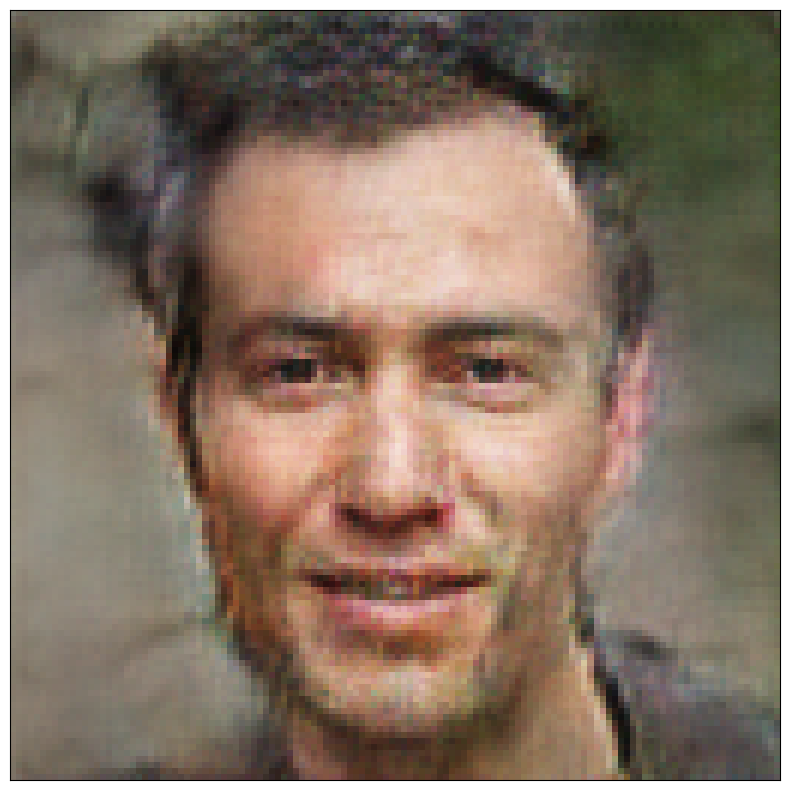

In [ ]:
plot_generated_images(1)

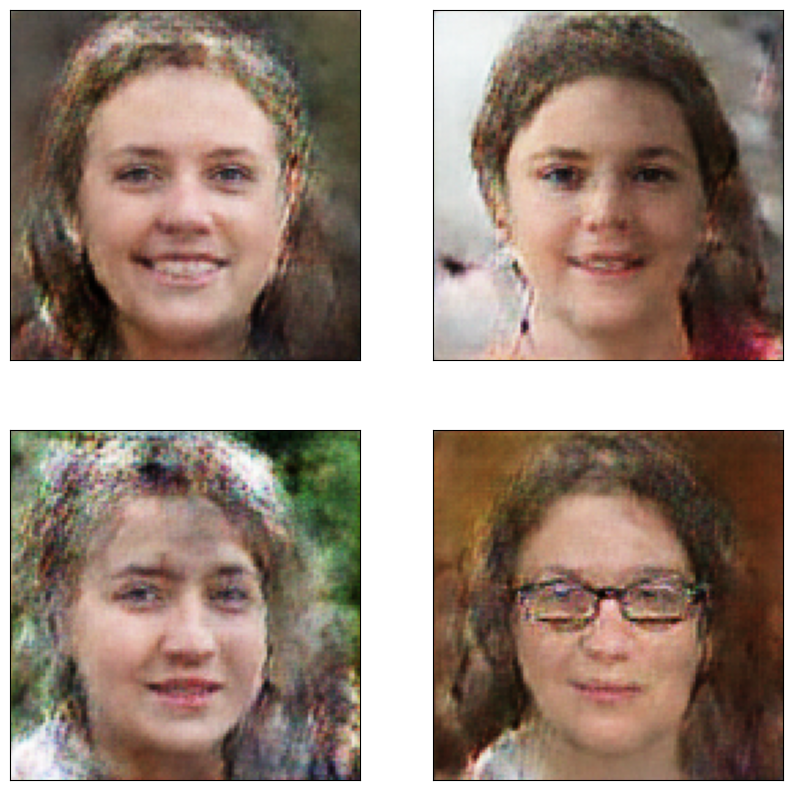

In [ ]:
plot_generated_images(2)

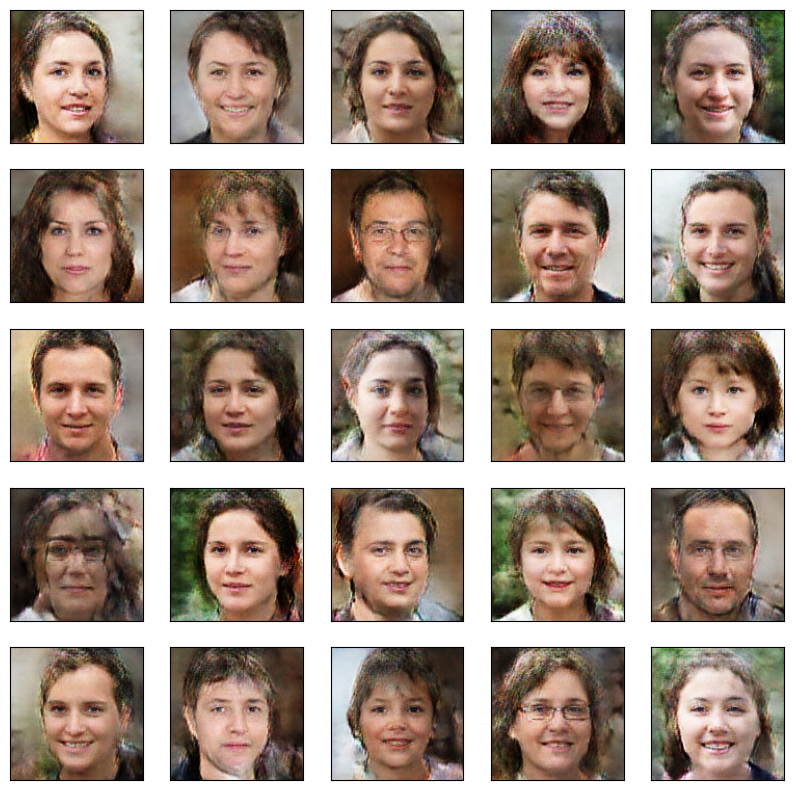

In [ ]:
plot_generated_images(5)

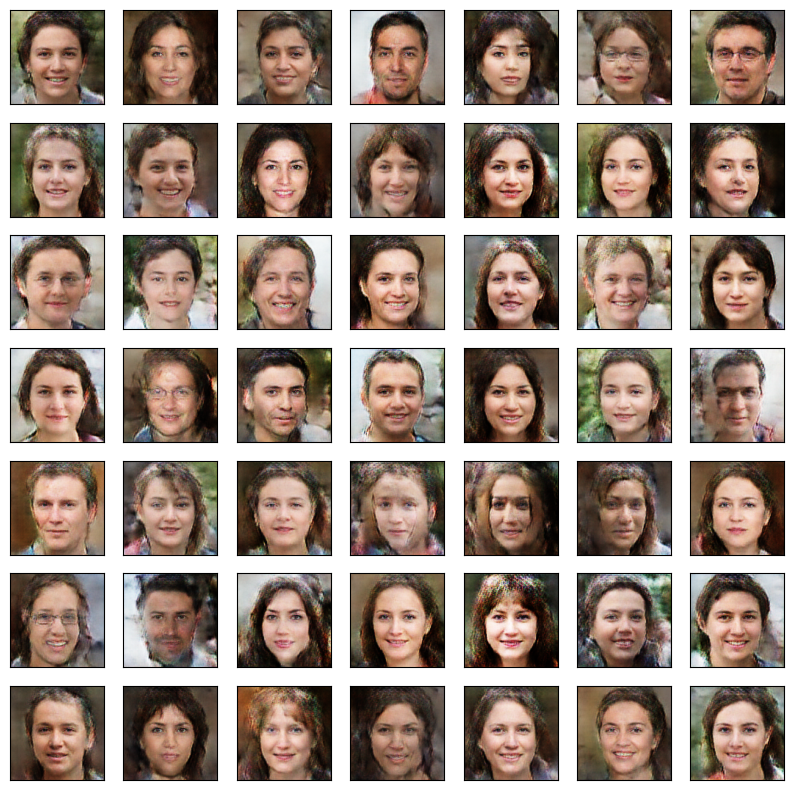

In [ ]:
plot_generated_images(7)

In [ ]:
generator.save('generator.h5')
discriminator.save("discriminator.h5")

#### ref: <a href = 'https://machinelearningmastery.com/what-are-generative-adversarial-networks-gans/'> machinelearningmastery </a>, <a href = 'https://towardsdatascience.com/generative-adversarial-network-gan-for-dummies-a-step-by-step-tutorial-fdefff170391'> towardsdatascience </a>


# Thank You